<a href="https://colab.research.google.com/github/zs-nemecz/ExperimentalMethodsClass/blob/master/Leiro_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Leíró statisztika

##Kísérletezés módszertana 2020/02
Oktató: Nemecz Zsuzsanna

Neptun kód: PSZB17-132:1

In [0]:
# A szükséges könyvtárak importálása
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as sp

##Középértékek: Átlag, Medián, Módusz

In [0]:
# Átlag
adatsor = [1.5, 3,3, 2.5, 2.7, 3.1, 1.5, 13.9, 3.7, 2.2, 3.8, 0.6, 1.5,4.3,5.2, 10.2, 10.6, 13.1,]
atlag = np.mean(adatsor)
print('Átlag:', atlag)

Átlag: 4.8


In [0]:
# Medián: helyzeti középérték, tehát a sorba rendezett adatsor közepén lévő elem
med = np.median(adatsor)
print('Medián', med)

Medián 3.05


In [0]:
# Módusz: a leggyakoribb elem
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html
modusz, elemszam = sp.mode(adatsor) # ez a mode funkció két elemmel tér vissza, az egyik a leggyakoribb elemek listája, a másik a leggyakoribb elemek számának listája
print('Módusz', modusz[0])
print('Módusz elemszáma:', elemszam[0])

Módusz 1.5
Módusz elemszáma: 3


Vegyük szemre az adatsort

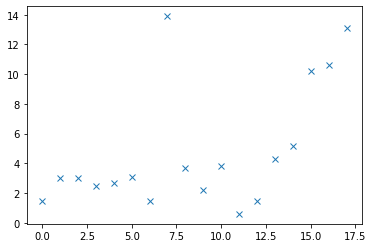

In [0]:
# Felhődiagram (scatter plot)
x = np.arange(0, len(adatsor), 1)
y = np.array(adatsor) # a listából tömböt csinálok, amely alkalmasabb az adatelemzésre
plt.plot(x,y, 'x')
plt.show()

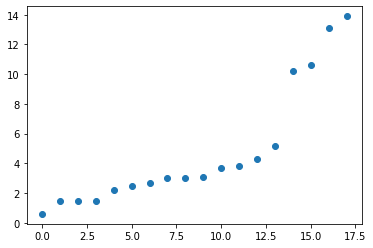

In [0]:
# Felhődiagram az adatok sorba rendezése után
y.sort() # sorba rendezés
plt.plot(x,y, 'o')
plt.show()


No handles with labels found to put in legend.


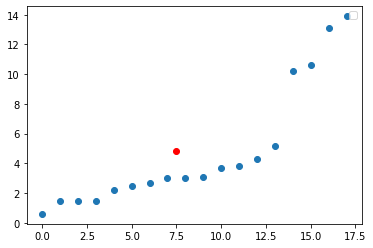

In [0]:
# Ábrázoljuk a középértékeket a felhődiagramra vetítve
plt.plot(x,y, 'o')
# az np.full funkció segítségével egy tömb struktúrát hozunk létre, hogy a középértékeket vonalként ábrázolhassuk
plt.plot(7.5, atlag, 'ro')


#plt.plot(x, np.full(y.shape,med), 'g', label='Medián') 
#plt.plot(x, np.full(y.shape,modusz), 'y', label='Módusz')
#plt.plot(x, np.full(y.shape,atlag), 'r', label='Átlag')
plt.legend() # az adatcímkék kiírása
plt.show()

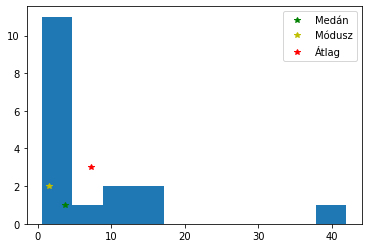

In [0]:
# A hisztogramról leolvasható az értékek eloszlása 
plt.hist(y) 
plt.plot(med, 1, 'g*', label='Medián')
plt.plot(modusz, 2, 'y*', label='Módusz')
plt.plot(atlag, 3, 'r*', label='Átlag')
plt.legend()
plt.show()

## Szóródási mutatók

In [0]:
# Terjedelem (range)
minimum = np.min(y)
maximum = np.max(y)
terjedelem = maximum - minimum 
print('Az adatsorban a minimum érték {}, a maximum érték {}, a terjedelem pedig {}.'. format(minimum, maximum, terjedelem))

Az adatsorban a minimum érték 0.6, a maximum érték 42.0, a terjedelem pedig 41.4.


In [0]:
# Szórás (standard deviation)
szoras = np.std(y)
# Variancia
variancia = np.var(y)
# Interkvantilis terjedelem ()
interkv = sp.iqr(y)
print('Az adatok szórása {}, a variancia {}, az interkvantilis terjedelem pedig {}'. format(szoras, variancia, interkv))

Az adatok szórása 9.618303629324785, a variancia 92.51176470588234, az interkvantilis terjedelem pedig 7.999999999999999


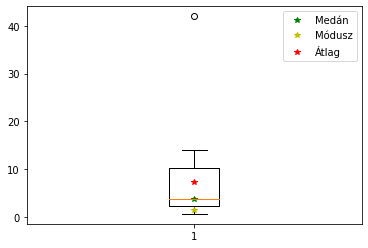

In [0]:
# A szóródás ábrázolása boxplottal (doboz ábra):
# a doboz alja és teteje az interkvantilis terjedelmet ábrázolják
# a doboz közepén lévő vonal a mediánt jelöli (ezért esik egybe a zöld csillaggal)
plt.boxplot(y)
plt.plot(1, med, 'g*', label='Medán')
plt.plot(1, modusz, 'y*', label='Módusz')
plt.plot(1, atlag, 'r*', label='Átlag')
plt.legend()
plt.show()

##Többváltozó elemzés

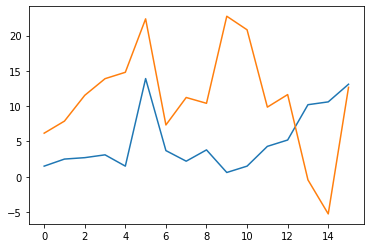

In [0]:
# Generáljunk egy adatsort, amely normális eloszlású, átlaga 13, szórása 6, és olyan hosszúságú, mint az eredeti y adatsorounk
y_2 =  np.random.normal(13, scale=6, size=y.shape) 
plt.plot(x, y)
plt.plot(x, y_2)
plt.show()

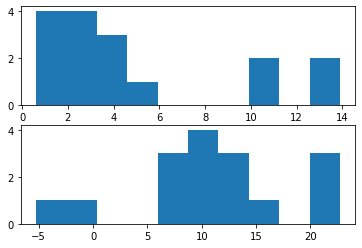

In [0]:
#Ábrázoljuk a két változó eloszlását hisztogramon
figure, axs = plt.subplots(2)
axs[0].hist(y)
axs[1].hist(y_2)
plt.show()

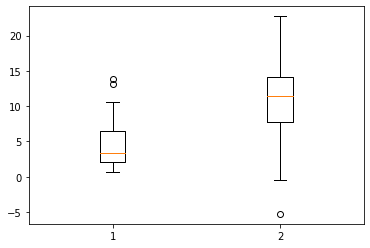

In [0]:
plt.boxplot([y, y_2])
plt.show()